In [25]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [26]:
databaseImage = pd.read_csv("data/Image/Image.csv", encoding="utf-8")
databaseImage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
 19  classe  2310 non-null   object 
dtypes: float64(16), int64(3), object(1)
memory usage: 361.1+ KB


In [27]:
X = databaseImage.iloc[:, :-1]
y = databaseImage.Class

correlationPearsonComplete = X.corr(method='pearson')
print(correlationPearsonComplete)

           att1      att2  att3      att4      att5      att6      att7  \
att1   1.000000  0.026768   NaN -0.051962 -0.015964 -0.011304  0.021960   
att2   0.026768  1.000000   NaN  0.064891  0.041869  0.026146 -0.053578   
att3        NaN       NaN   NaN       NaN       NaN       NaN       NaN   
att4  -0.051962  0.064891   NaN  1.000000 -0.009024 -0.020206 -0.032781   
att5  -0.015964  0.041869   NaN -0.009024  1.000000  0.262575  0.193728   
att6  -0.011304  0.026146   NaN -0.020206  0.262575  1.000000  0.637452   
att7   0.021960 -0.053578   NaN -0.032781  0.193728  0.637452  1.000000   
att8  -0.018914  0.105223   NaN -0.021286  0.303182  0.559491  0.471016   
att9  -0.001939 -0.021077   NaN -0.037996  0.243155  0.488347  0.703049   
att10  0.058957 -0.465240   NaN -0.018211 -0.006911  0.005129  0.003006   
att11  0.054673 -0.468009   NaN -0.016755 -0.012471 -0.005482 -0.002138   
att12  0.058169 -0.481521   NaN -0.021392  0.003078  0.020498  0.006782   
att13  0.063381 -0.437971

In [28]:
df1 = pd.DataFrame(correlationPearsonComplete)
df1.to_csv("data/Image/CorrelacaoPearsonComplete.csv", index=False)

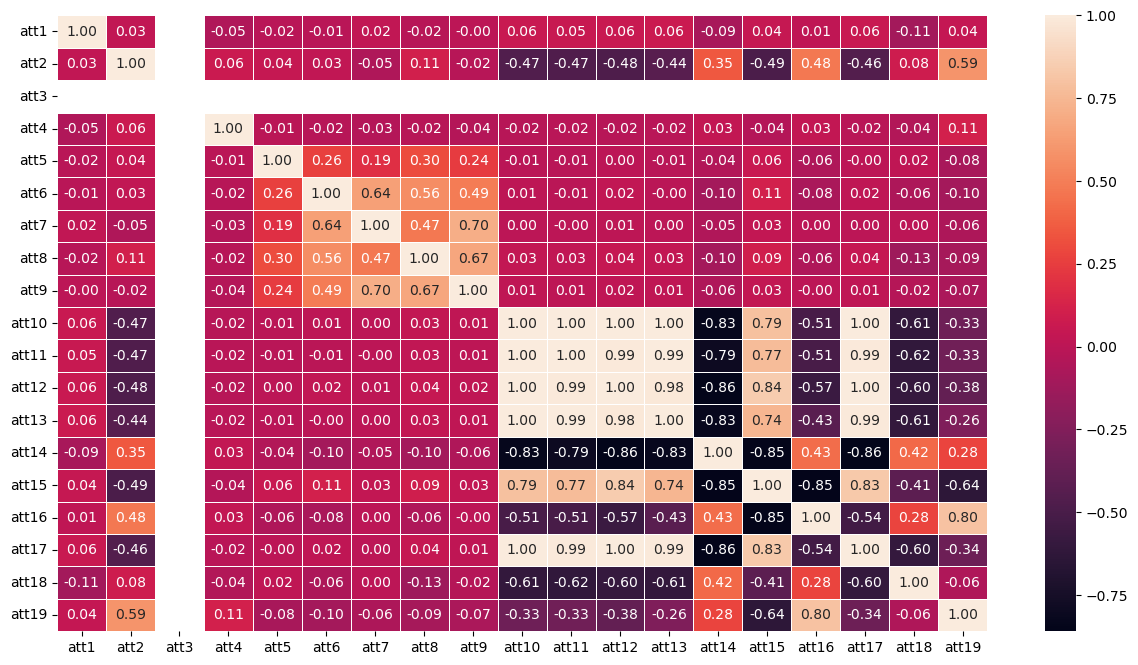

In [29]:
plt.figure(figsize=(15, 8))
plot = sn.heatmap(correlationPearsonComplete, annot=True, fmt=".2f", linewidths=.6)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_std = StandardScaler().fit_transform(X)
print(X_std)
print(X_std.shape)

[[ 0.20682745  0.02753863  0.         ... -0.87060219  0.52020515
   0.15603807]
 [ 0.86489591  0.16673829  0.         ... -0.85506669  0.48929742
   0.28354673]
 [-0.27301413  0.27113803  0.         ... -0.87578071  0.46322189
   0.25692603]
 ...
 [ 0.04231034  0.65393708  0.         ... -0.7981032   0.49954012
  -0.40997389]
 [ 0.34392505  0.60173721  0.         ... -0.76703221  0.33379929
  -0.37576162]
 [-0.0125287   0.67133703  0.         ... -0.71265797  0.23235795
  -0.43133634]]
(2310, 19)


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca90 = PCA(n_components=0.90, whiten=True)
X_std_pca90 = pca90.fit_transform(X_std)

print(X_std_pca90)
print(X_std_pca90.shape)

[[-0.84779604 -0.33288895 -0.48577072 ... -0.14349226 -0.01505348
  -0.82773129]
 [-0.86840537 -0.35041054 -0.32264159 ... -0.33818845 -0.01375555
  -0.85626892]
 [-0.88952731 -0.3182861  -0.39727735 ...  0.08554218  0.19282509
  -0.80009693]
 ...
 [-0.72391805 -0.25360572 -0.51186991 ...  0.08865961  0.3589104
  -0.05380344]
 [-0.67793199 -0.04200238 -0.41642631 ... -0.05591089  0.54432223
   0.15128266]
 [-0.62641902 -0.12249918 -0.15616505 ... -1.26471373  0.23282802
  -0.0230429 ]]
(2310, 8)


In [34]:
df1 = pd.DataFrame(X_std_pca90)
df1.to_csv("data/Image/PCA90.csv", index=False)

In [35]:
pca10 = PCA(n_components=10, whiten=True)
X_std_pca10 = pca10.fit_transform(X_std)

print(X_std_pca10)
print(X_std_pca10.shape)

[[-0.84779604 -0.33288895 -0.48577072 ... -0.82773129 -0.37607542
  -0.41836835]
 [-0.86840537 -0.35041054 -0.32264159 ... -0.85626892 -0.42657
  -0.47953007]
 [-0.88952731 -0.3182861  -0.39727735 ... -0.80009693 -0.3691212
  -0.5850705 ]
 ...
 [-0.72391805 -0.25360572 -0.51186991 ... -0.05380344  0.20403284
  -0.77340603]
 [-0.67793199 -0.04200238 -0.41642631 ...  0.15128266 -0.19614917
  -0.26078179]
 [-0.62641902 -0.12249918 -0.15616505 ... -0.0230429   0.31781008
  -0.33232701]]
(2310, 10)


In [36]:
df1 = pd.DataFrame(X_std_pca10)
df1.to_csv("data/Image/PCA10.csv", index=False)